In [26]:
#Importing our Packages: Analytics
import pandas as pd
import numpy as np

#Viz libaries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

#Data_libraries
import pymysql
import sqlalchemy


#Sklearn libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso

#Scoring libraries
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score

# Whole Data

In [283]:
data = pd.read_csv('geodata.csv')
data.shape

(199987, 12)

In [284]:
df = data.copy()

In [285]:
df.shape

(199987, 12)

In [286]:
df.code = df.code.astype('str') 

In [287]:
df.head()

,code,type,Year,commune,Code_post,Prixm2,price,Avg_sqm,transactions,lat,lon,No_rooms
0,1370,Appartement,2016,Saint-Laurent-sur-Saône,1750,1770,95397,63,37,46.310,4.843,2.7
1,1364,Maison,2016,Saint-Jean-sur-Reyssouze,1560,1272,140964,118,18,46.422,5.086,4.3
2,1050,Maison,2016,Boissey,1190,2079,203700,98,2,46.383,4.997,4.0
3,1024,Maison,2016,Attignat,1340,1683,191936,119,50,46.297,5.195,4.3
4,1130,Maison,2016,Bresse Vallons,1340,1812,194269,112,33,46.335,5.216,4.5


In [288]:
df[df.commune == 'Paris']

,code,type,Year,commune,Code_post,Prixm2,price,Avg_sqm,transactions,lat,lon,No_rooms


In [289]:
def transform_string(string, separator):
    L = string.split(separator)
    return L[0] if L[0] in ['Paris', 'Marseille', 'Lyon'] else L[0]

df.commune = df.commune.apply(lambda x: transform_string(x,' '))
#df = df.groupby(df.commune).sum().reset_index(drop=False)
df.shape

(199987, 12)

In [290]:
df.head()

,code,type,Year,commune,Code_post,Prixm2,price,Avg_sqm,transactions,lat,lon,No_rooms
0,1370,Appartement,2016,Saint-Laurent-sur-Saône,1750,1770,95397,63,37,46.310,4.843,2.7
1,1364,Maison,2016,Saint-Jean-sur-Reyssouze,1560,1272,140964,118,18,46.422,5.086,4.3
2,1050,Maison,2016,Boissey,1190,2079,203700,98,2,46.383,4.997,4.0
3,1024,Maison,2016,Attignat,1340,1683,191936,119,50,46.297,5.195,4.3
4,1130,Maison,2016,Bresse,1340,1812,194269,112,33,46.335,5.216,4.5


# Dataframes for Paris, Marseille and Lyon

In [291]:
df = df[df['type'] == 'Appartement']
df_Paris = df[df['commune'] == 'Paris']
df_Paris.shape

(103, 12)

In [292]:
geodf_Paris = df_Paris[['code','transactions', 'Prixm2']]

In [293]:
df_Marseille = df[df['commune'] == 'Marseille']
df_Marseille.shape

(90, 12)

In [294]:
geodf_Marseille = df_Marseille[['code','transactions', 'Prixm2']]

In [295]:
df_Lyon = df[df['commune'] == 'Lyon']
df_Lyon.shape

(45, 12)

In [296]:
geodf_Lyon = df_Lyon[['code','transactions', 'Prixm2']]
geodf_Lyon.shape

(45, 3)

In [297]:
geodf_Paris.transactions.min()

1

# Folium Maps

In [236]:
import requests
url = 'https://raw.githubusercontent.com/Jehadel/reestimator/JulienVis/notebooks/Julien/arrondissements-millesimes0.geojson'
response =  requests.get(url).json()
response.keys()

dict_keys(['type', 'features'])

## Paris

In [237]:


# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[48.899240, 2.368462], zoom_start=11)

# show the map
m
folium.Choropleth(
    geo_data=response,
    name="choropleth",
    data=geodf_Paris,
    columns=["code", "transactions"],
    key_on= "feature.properties.code_insee",
    fill_color="OrRd",
    fill_opacity=0.8,
    line_opacity=.01,
    legend_name="transaction par commune",
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Marseille

In [238]:


# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[43.2924013477, 5.39786536432], zoom_start=11)

# show the map
m
folium.Choropleth(
    geo_data=response,
    name="choropleth",
    data=geodf_Marseille,
    columns=["code", "transactions"],
    key_on= "feature.properties.code_insee",
    fill_color="OrRd",
    fill_opacity=0.8,
    line_opacity=.01,
    legend_name="transaction par commune",
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Lyon

In [239]:


# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[45.7480493185, 4.82567584415], zoom_start=11)

# show the map
m
folium.Choropleth(
    geo_data=response,
    name="choropleth",
    data=geodf_Lyon,
    columns=["code", "transactions"],
    key_on= "feature.properties.code_insee",
    fill_color="OrRd",
    fill_opacity=0.8,
    line_opacity=.01,
    legend_name="transaction par commune",
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

## One map for the 3 cities

In [240]:
df_3 =  df[
    (df['commune'] == 'Paris')
    |  (df['commune'] == 'Marseille')
    |  (df['commune'] == 'Lyon')
]

In [241]:
df_3.shape

(238, 12)

In [242]:
geodf_3 = df_3[['code','transactions']]
geodf_3.shape

(238, 2)

In [243]:
geodf_3.head()

,code,transactions
4833,13203,619
4834,13204,836
4835,13215,489
4836,13214,461
4837,13201,849


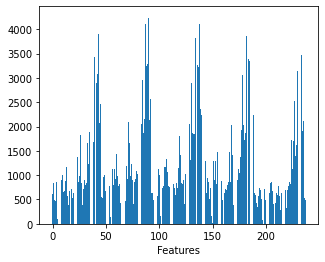

In [245]:
K =  geodf_3['transactions']
fig, ax = plt.subplots(figsize = (5,4))
# plot feature importance
plt.bar([x for x in range(len(K))], K)
plt.xlabel("Features")
#plt.xticks(range(len(F)), F,
       #   rotation = 45)
#plt.xlabel("Regression coefficients")
plt.show()

In [248]:


# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[45.7480493185, 4.82567584415], zoom_start=11)

# show the map
m
folium.Choropleth(
    geo_data=response,
    name="choropleth",
    data=geodf_3,
    columns=["code", "transactions"],
    key_on= "feature.properties.code_insee",
    fill_color="OrRd",
    fill_opacity=0.8,
    line_opacity=.01,
    legend_name="transaction par commune",
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
geodf_3_scaled = geodf_3.copy()
geodf_3_scaled[['transactions']] = scaler.fit_transform(geodf_3_scaled[['transactions']])

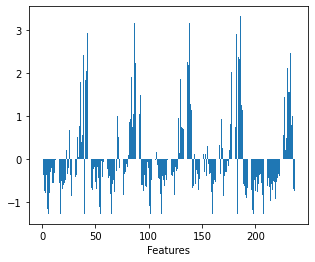

In [247]:
K =  geodf_3_scaled['transactions']
fig, ax = plt.subplots(figsize = (5,4))
# plot feature importance
plt.bar([x for x in range(len(K))], K)
plt.xlabel("Features")
#plt.xticks(range(len(F)), F,
       #   rotation = 45)
#plt.xlabel("Regression coefficients")
plt.show()

In [36]:
def transform_string(string, separator):
    L = string.split(separator)
    return L[0] if L[0] in ['Paris', 'Marseille', 'Lyon'] else L[0]

#geodf.commune = geodf.commune.apply(lambda x: transform_string(x,' '))
#geodf = geodf.groupby(geodf.commune).sum().reset_index(drop=False)
#geodf.shape

In [51]:
import requests
url = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/communes-version-simplifiee.geojson'
response =  requests.get(url).json()
response.keys()

dict_keys(['type', 'features'])

In [97]:
import requests
url = 'https://raw.githubusercontent.com/Jehadel/reestimator/JulienVis/notebooks/Julien/arrondissements-millesimes0.geojson'
response =  requests.get(url).json()
response.keys()


dict_keys(['type', 'features'])

In [98]:
response['type']

'FeatureCollection'

In [99]:
len(response['features'])

45

In [100]:
response['features'][0]['properties']

{'nom_reg': 'ILE-DE-FRANCE',
 'dpartement': 'PARIS',
 'code_insee': '75106',
 'y_centroid': 6861391,
 'code_rgion': 11,
 'code_dpartement': 75,
 'nom_com': 'PARIS-6E-ARRONDISSEMENT',
 'geo_point': [48.8491121688, 2.33284677548],
 'anne': '2016',
 'code_ville': '75056',
 'x_centroid': 651135,
 'y_chf_lieu': 6861403,
 'altitude_moyenne': 40,
 'commune': 'PARIS-6E-ARRONDISSEMENT',
 'statut': 'Commune simple',
 'code_commune': 106,
 'x_chf_lieu': 651008,
 'superficie': 215,
 'population': 43479.0,
 'code_arrondissement': 1,
 'rgion': 'ILE-DE-FRANCE',
 'code_com': 106,
 'id_geofla': 'COMMUNE00000000000032064'}

In [101]:
response['features'][1]['properties']['commune']

'PARIS-18E-ARRONDISSEMENT'

In [102]:
for i in range(5): #(len(response['features'])):
    print(response['features'][i]['properties']['commune'], response['features'][i]['properties']['geo_point'])

PARIS-6E-ARRONDISSEMENT [48.8491121688, 2.33284677548]
PARIS-18E-ARRONDISSEMENT [48.8924795867, 2.34788399022]
MARSEILLE-5E-ARRONDISSEMENT [43.2924013477, 5.39786536432]
PARIS-1ER-ARRONDISSEMENT [48.8625262113, 2.33630086089]
PARIS-11E-ARRONDISSEMENT [48.8591103087, 2.38017728226]


In [103]:


# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[48.899240, 2.368462], zoom_start=11)

# show the map
m
folium.Choropleth(
    geo_data=response,
    name="choropleth",
    data=geodf,
    columns=["code", "transactions"],
    key_on= "feature.properties.code_insee",
    fill_color="OrRd",
    fill_opacity=0.8,
    line_opacity=.01,
    legend_name="transaction par commune",
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [105]:
# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[48.899240, 2.368462], zoom_start=11)

# show the map
m
folium.Choropleth(
    geo_data=response,
    name="choropleth",
    data=geodf,
    columns=["code", "transactions"],
    key_on= "feature.properties.code_insee",
    fill_color="OrRd",
    fill_opacity=0.8,
    line_opacity=.01,
    legend_name="transaction par commune",
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

# Rename DataFrame columns 

In [342]:
df = pd.read_csv('final_data.csv', dtype = {'code_dept' : object})
df.head(2)

,code,type,Year,commune,code_dep,Surface,Code_post,Prixm2,price,Avg_sqm,transactions,lat,lon,No_rooms
0,1370,Appartement,2016,Saint-Laurent-sur-Saône,1,9,1750,1770,95397,63,37,46.310,4.843,2.7
1,1364,Maison,2016,Saint-Jean-sur-Reyssouze,1,1714,1560,1272,140964,118,18,46.422,5.086,4.3


In [343]:
df.columns

Index(['code', 'type', 'Year', 'commune', 'code_dep', 'Surface', 'Code_post',
       'Prixm2', 'price', 'Avg_sqm', 'transactions', 'lat', 'lon', 'No_rooms'],
      dtype='object')

In [344]:
df.dtypes

code              int64
type             object
Year              int64
commune          object
code_dep          int64
Surface           int64
Code_post         int64
Prixm2            int64
price             int64
Avg_sqm           int64
transactions      int64
lat             float64
lon             float64
No_rooms        float64
dtype: object

In [336]:
df.shape

(199987, 14)

In [337]:
new_names = ['Code commune', 'Type du local', 'Année', 
             'Nom de commune', 'Code département', 'Surface du terrain', 'Code postal',
             'Prix moyen m2', 'Valeur totale', 'Surface moyenne', 
             'Transactions', 'Latitude', 'Longitude', 'Nbre pièces principales']

df.columns = new_names        # Rename columns)
#data.columns

In [338]:
df.head(2)

,Code commune,Type du local,Année,Nom de commune,Code département,Surface du terrain,Code postal,Prix moyen m2,Valeur totale,Surface moyenne,Transactions,Latitude,Longitude,Nbre pièces principales
0,1370,Appartement,2016,Saint-Laurent-sur-Saône,1,9,1750,1770,95397,63,37,46.310,4.843,2.7
1,1364,Maison,2016,Saint-Jean-sur-Reyssouze,1,1714,1560,1272,140964,118,18,46.422,5.086,4.3


In [339]:
#Export Pandas DataFrame to a CSV File
df.to_csv (r'/Users/kenzaelhoussaini/code/Jehadel/reestimator/notebooks/Kenza/final_data_columns_renamed.csv',
             index = False, header=True) # save 


In [340]:
data = pd.read_csv('final_data_columns_renamed.csv')
data.shape

(199987, 14)

In [341]:
data.head(2)

,Code commune,Type du local,Année,Nom de commune,Code département,Surface du terrain,Code postal,Prix moyen m2,Valeur totale,Surface moyenne,Transactions,Latitude,Longitude,Nbre pièces principales
0,1370,Appartement,2016,Saint-Laurent-sur-Saône,1,9,1750,1770,95397,63,37,46.310,4.843,2.7
1,1364,Maison,2016,Saint-Jean-sur-Reyssouze,1,1714,1560,1272,140964,118,18,46.422,5.086,4.3
